# Definições


In [13]:
import numpy as np

np.random.seed(42)
trials = 10000


def investimento():
    return np.random.normal(100, 10)


def lucro():
    return np.random.normal(100, 10)


anos_de_operação = 5
taxa_de_desconto = 0.1


# Métricas


## Retorno sobre Investimento (ROI)


O ROI do projeto é 100.98%


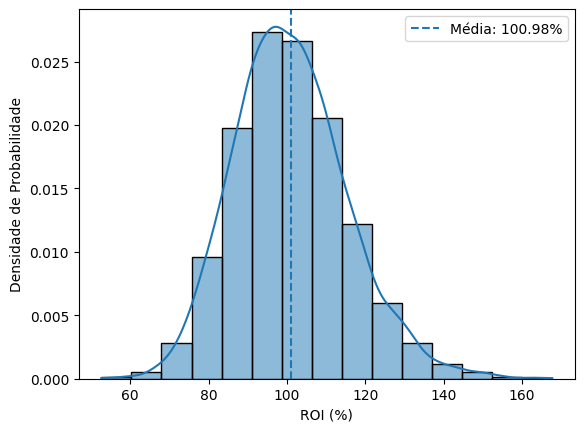

In [14]:
from plots import plot_density


def calcular_roi(lucro, investimento):
    return (lucro / investimento) * 100


roi_values = np.array([calcular_roi(lucro(), investimento()) for _ in range(trials)])
print(f"O ROI do projeto é {roi_values.mean():.2f}%")

plot_density(roi_values, "ROI", "%")


## Valor Presente Líquido (VPL)


O VPL do projeto é R$479.09


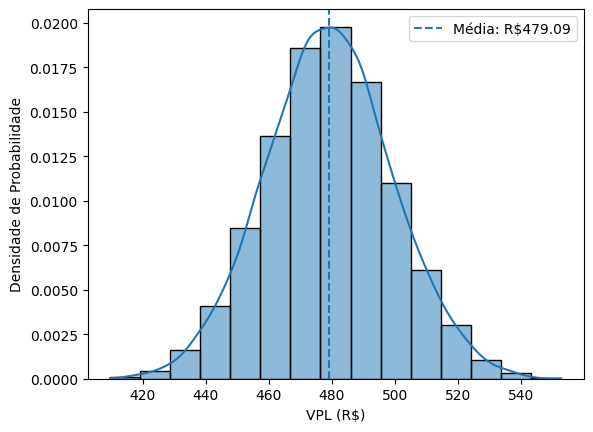

In [15]:
def calcular_vpl(taxa_desconto, fluxos_caixa):
    vpl = 0
    for t, fc in enumerate(fluxos_caixa):
        vpl += fc / (1 + taxa_desconto) ** t
    return vpl


def calcular_fluxos_caixa():
    return [investimento()] + [lucro() for _ in range(5)]


vpl_values = np.array(
    [calcular_vpl(taxa_de_desconto, calcular_fluxos_caixa()) for _ in range(trials)]
)
print(f"O VPL do projeto é R${vpl_values.mean():.2f}")

plot_density(vpl_values, "VPL", "R$", True)


## TIR (Taxa Interna de Retorno)


In [16]:
from scipy.optimize import root

tir = root(calcular_vpl, x0=0.5, args=(calcular_fluxos_caixa()))

print(tir)


 message: The iteration is not making good progress, as measured by the 
            improvement from the last ten iterations.
 success: False
  status: 5
     fun: [ 1.066e+02]
       x: [ 1.714e+06]
  method: hybr
    nfev: 25
    fjac: [[-1.000e+00]]
       r: [ 2.644e-10]
     qtf: [-1.066e+02]
